Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513/EEL410250 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bB}{\mathbf{B}}$
$\newcommand{\mat}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\newcommand{\matt}[1]{\begin{matrix} #1 \end{matrix}}$



# Exercício 1: Introdução e Regressão Linear

Este é um exercício de introdução ao Python e bibliotecas básicas. Também serão abordados conceitos básicos de exploração de dados e regressão linear.

<!--O exercício resolvido, em formato `.ipynb`, completo com explicações e gráficos integrados, deve ser submetido via moodle até o prazo especificado.-->

# Preparação / Revisão

- Ler Watt _(Machine Learning Refined)_ cap. 1
- Ler Watt apêndices A, B (de B.3 apenas os exemplos B.1.a e B.2.a) e D
- Ler e praticar todos os tutoriais fornecidos (exceto os exemplos mais complexos do tutorial de NumPy)
- Revisar (caso necessário) conceitos básicos de probabilidade e estatística: variáveis aleatórias, distribuição/densidade de probabilidade, histograma, média, variância, correlação

In [1]:
# Inicie importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Manipulando arrays

1. Escreva uma função do Python que implementa a [similaridade do cosseno](https://en.wikipedia.org/wiki/Cosine_similarity) (eq. A.7 do Watt) entre dois vetores, definida por

$$
{\rm cosine\_similarity(\bx,\by)} = \frac{\bx^T \by}{\|\bx\|\|\by\|}
$$

In [2]:
def cosine_similarity(x,y):
    s = (x.T @ y)/(np.linalg.norm(x)*np.linalg.norm(y))
    return s

# Testes
x = np.array([1,2,3,4])
y = np.array([2,2,2,2])
z = np.array([2,-2,2,-2])
print(cosine_similarity(x,y)) # = 0.9128709291752769
print(cosine_similarity(x,z)) # = -0.18257418583505536

0.9128709291752769
-0.18257418583505536


### Dicas

- Use o operator @ (ver [documentação](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)) ao invés de `.dot()` para implementar  multiplicação matriz-matriz ou matriz-vetor, por exemplo: `C = A @ B`
- Funções úteis:

```python
np.linalg.norm()
```

2. Calcule os produtos $\bA^T\bB$ e $\bB \bA^T$, onde
$$\bA = \mat{1 & 2 \\ 3 & 4 \\ 5 & 6} \qquad \bB = \mat{1 & 1 \\ 1 & 1 \\ 1 & 1}$$

In [3]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.ones((3,2))

ATB = A.T @ B
BAT = B @ A.T


print(f"Matriz transposta de A:\n{A.T}\n")
print(f"Valor de ATB:\n {ATB}\n")
print(f"Valor de ATB:\n {BAT}\n")

Matriz transposta de A:
[[1 3 5]
 [2 4 6]]

Valor de ATB:
 [[ 9.  9.]
 [12. 12.]]

Valor de ATB:
 [[ 3.  7. 11.]
 [ 3.  7. 11.]
 [ 3.  7. 11.]]



3. Considere os vetores abaixo.

In [4]:
A = np.array([[1,0,1],[0,1,0],[1,1,1]])
A

array([[1, 0, 1],
       [0, 1, 0],
       [1, 1, 1]])

In [5]:
b = np.array([1,2,3])
b

array([1, 2, 3])

Explique o porquê do resultado abaixo.

In [6]:
np.all(b*A == A*b)

True

In [7]:
b*A

array([[1, 0, 3],
       [0, 2, 0],
       [1, 2, 3]])

**Resposta:** 
np.all(b*A == A*b): verifica se todos os elementos das matrizes resultantes,(b*A) e (A*b) são iguais. Se sim, retorna True, caso contrário, False. Como os valores são identicos, retorna True.

**<p> O que está acontecendo nas operações:**
    
    Vetor b: [1 2 3]

    Matriz A:[1 0 1]
             [0 1 0]
             [1 1 1]
        
    b*A:     [1*1 + 2*0 + 3*1]     [1  0  3]
             [1*0 + 2*1 + 3*0]  =  [0  2  0]
             [1*1 + 2*1 * 3*1]     [1  2  3]
    
             [1*1 + 0*2 + 1*3]     [1  0  3]
    A*b      [0*1 + 1*2 + 0*3]  =  [0  2  0]
             [1*1 + 1*2 * 1*3]     [1  2  3]
    
    Sintaxe:    
           b[1,1]*A[1,1]  b[1][2]*A[2,1]  b[1,3]*A[3,1] 
    b*A    b[1,1]*A[1,2]  b[1][2]*A[2,2]  b[1,3]*A[3,2] 
           b[1,1]*A[1,3]  b[1][2]*A[2,3]  b[1,3]*A[3,3]
    
           A[1,1]*b[1,1]  A[1][2]*b[1,2]  A[1,3]*b[1,3] 
    A*b    A[2,1]*b[1,1]  A[2][2]*b[1,2]  A[2,3]*b[1,3]
           A[3,1]*b[1,1]  A[3][2]*b[1,2]  A[3,3]*b[1,3]


# 2. Manipulando dados

1. Baixe o arquivo `bitcoin_price.csv` (**terceiro** arquivo da lista em *Data Sources*) disponível em

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory/

e salve-o numa subpasta `data`, i.e., o arquivo estará acessível em `data/bitcoin_price.csv`

2. Carregue o arquivo usando a biblioteca Pandas
3. Trace o gráfico do preço de fechamento ("Close") em função da data para todo o ano de 2017 (365 amostras):
 - usando a função `.plot()` do Pandas
 - convertendo para NumPy e usando Matplotlib

### Dicas

- Siga o notebook fornecido de exemplo do Pandas e/ou qualquer outro tutorial de Pandas (https://pandas.pydata.org/pandas-docs/stable/10min.html)

### Carregando os dados:

In [8]:
data = pd.read_csv('data/bitcoin_price.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


### Gráfico do preço de fechamento ("Close") em função da data para todo o ano de 2017 (365 amostras):

In [9]:
#criei data_filter para manter o dataframe inteiro armazenado na variável 'data'
data_filter = data[['Date','Close']]
data_filter.head(2)

,Date,Close
0,"Feb 20, 2018",11403.7
1,"Feb 19, 2018",11225.3


In [10]:
data_filter['Date'] = pd.to_datetime(data_filter['Date']) #transformando em timestamp
data_filter.head()

C:\Users\victo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close
0,2018-02-20,11403.7
1,2018-02-19,11225.3
2,2018-02-18,10551.8
3,2018-02-17,11112.7
4,2018-02-16,10233.9


In [11]:
inicio_do_ano = '2017-01-01'
final_do_ano = '2017-12-31'

data_filter = data_filter.loc[(data_filter['Date'] >= inicio_do_ano) & (data_filter['Date'] <= final_do_ano)]

In [12]:
data_filter.shape

(365, 2)

In [13]:
print(f"Conjunto de dados de 2017, contendo {data_filter.shape[0]} linhas e {data_filter.shape[1]} colunas")
data_filter.head()

Conjunto de dados de 2017, contendo 365 linhas e 2 colunas


,Date,Close
51,2017-12-31,14156.4
52,2017-12-30,12952.2
53,2017-12-29,14656.2
54,2017-12-28,14606.5
55,2017-12-27,15838.5


#### Plot utilizando Pandas

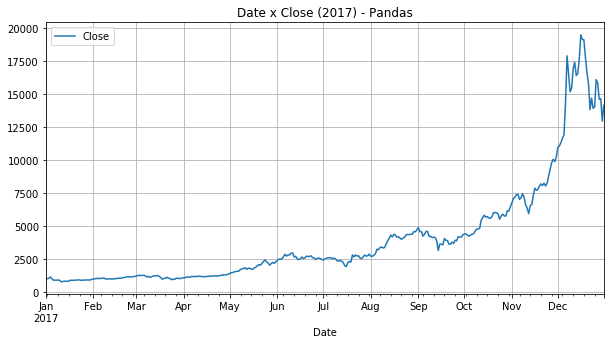

In [14]:
data_filter.plot(x='Date',y='Close', title='Date x Close (2017) - Pandas', grid=True, figsize =(10,5))

#### Plot utilizando numpy e matplotlib

In [15]:
data_numpy = data_filter['Date'].to_numpy()
close_numpy = data_filter['Close'].to_numpy()

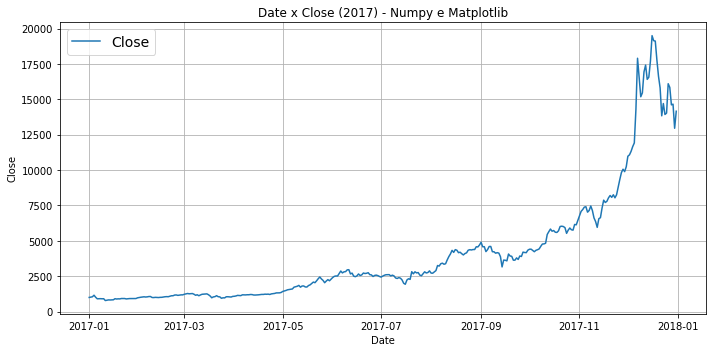

In [16]:
plt.figure(figsize = (10,5))
plt.plot(data_numpy, close_numpy)
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid()
plt.legend(['Close'], fontsize=14)
plt.title('Date x Close (2017) - Numpy e Matplotlib')
plt.tight_layout()

# 3. Análise de dados

Agora, veremos um exemplo de análise de dados usando um conjunto de dados do livro do James _(An Introduction to Statistical Learning)_.

Carregue os dados usando o comando abaixo. Lembre que a variável-alvo (rótulo, variável de saída) é a coluna `sales`.

In [17]:
df = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


1. Trace o histograma de cada variável (coluna), i.e., 4 no total. Para isso, utilize a função `plt.hist()`, com parâmetro `bins=30`.
2. Calcule a matriz de correlação entre as colunas. Dica: utilize a função `pd.DataFrame.corr()`
3. Para cada atributo (variável de entrada), trace o gráfico do valor-alvo em função do atributo. Utilize um *scatter plot*, i.e., trace apenas os marcadores, não linhas.
4. O que você já pode afirmar sobre os dados a partir dessa análise exploratória?

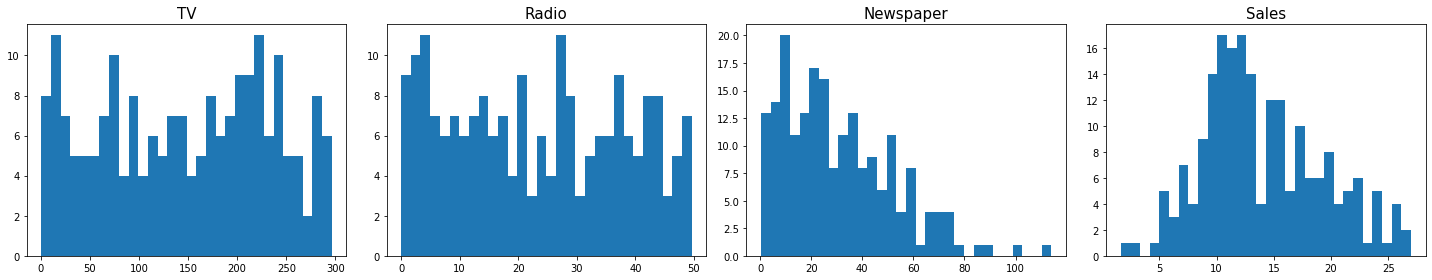

In [18]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

ax1.hist(df['TV'], bins = 30)
ax1.set_title("TV", fontsize=15)

ax2.hist(df['radio'], bins = 30)
ax2.set_title("Radio", fontsize=15)

ax3.hist(df['newspaper'], bins = 30)
ax3.set_title("Newspaper", fontsize=15)

ax4.hist(df['sales'], bins = 30)
ax4.set_title("Sales", fontsize=15)

plt.tight_layout()

### Matriz de correlação

In [19]:
correlação = df.corr()
correlação

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Scatter Plot

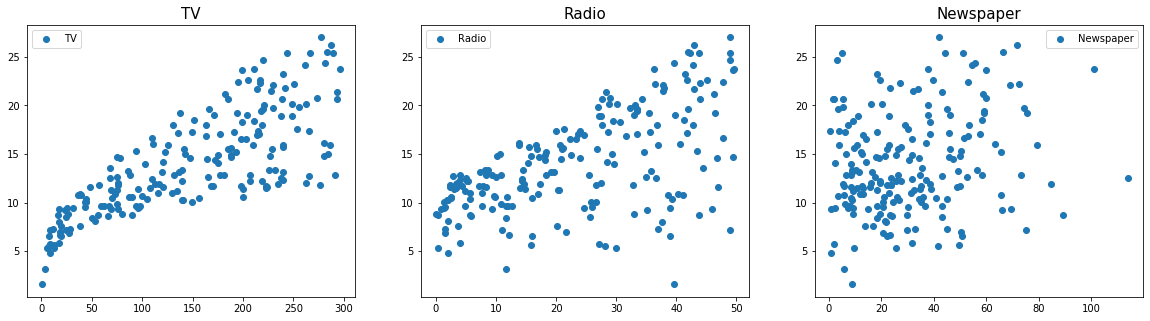

<Figure size 360x360 with 0 Axes>

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

plt.figure(figsize = (5,5))

ax1.scatter(df['TV'], df['sales'])
ax1.set_title("TV", fontsize=15)
ax1.legend(['TV'])

ax2.scatter(df['radio'], df['sales'])
ax2.set_title("Radio", fontsize=15)
ax2.legend(['Radio'])

ax3.scatter(df['newspaper'], df['sales'])
ax3.set_title("Newspaper", fontsize=15)
ax3.legend(['Newspaper'])

plt.tight_layout()

O que você já pode afirmar sobre os dados a partir dessa análise exploratória?
**<p>Resposta:** Podemos analisar a correlação entre as variáveis. Por meio de dados numéricos e gráficos pode-se perceber a relação entre uma variável e outra. Claramente, as divulgações por meio de TV tem maior relação com as vendas.

5. Extraia a matriz de projeto $\bX$ e vetor de rótulos $\by$. Dica: utilize a função do pandas `.to_numpy()`
1. Separe o conjunto de dados aleatoriamente em conjuntos de treinamento e teste, nas proporções 80% e 20%, respectivamente. Para isso, utilize a função `train_test_split()` da biblioteca scikit-learn.

In [21]:
X = df[['radio','newspaper','TV']].to_numpy()
y = df['sales'].to_numpy()
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


7. Treine um modelo de regressão linear sobre o **conjunto de treinamento**. Para isso, utilize a função `sklearn.linear_model.LinearRegression()` da biblioteca sklearn. 
7. Calcule a raiz do erro quadrático médio (RMSE) da predição sobre o conjunto de treinamento e sobre o conjunto de teste. Para isso, utilize a função `sklearn.metrics.mean_squared_error()` do sklearn.
8. (OPCIONAL) Encontre alguma forma de visualizar o modelo treinado ou suas predições.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Conjunto de treinamento
y_train_predict = model.predict(X_train)

print(f"Feature Vector: {X_train[0]}")
print(f"Valor real: {y_train[0]}")
print(f"Valor previsto: {y_train_predict[0]}")

Feature Vector: [38.6 65.6 36.9]
Valor real: 10.8
Valor previsto: 12.0423648541063


In [34]:
y_test_predict = model.predict(X_test)
print(f"Feature Vector: {X_test[0]}")
print(f"Valor real: {y_test[0]}")
print(f"Valor previsto: {y_test_predict[0]}")

Feature Vector: [20.5 18.3 69.2]
Valor real: 11.3
Valor previsto: 10.057395632113412


In [35]:
# Conjunto de teste
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_predict)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_predict)))

Train RMSE: 1.5513912323520802
Test RMSE: 2.09812256349568


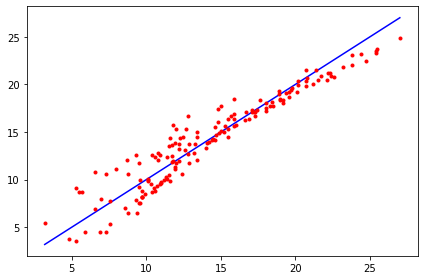

In [99]:
idx = y_train.argsort() #retorna o index dos valores, em ordem crescente.
plt.plot(y_train[idx], y_train[idx], 'b-')
plt.plot(y_train[idx], y_train_predict[idx], 'r.')

plt.tight_layout()

### Dicas

- Funções úteis
```python
pd.hist()
pd.DataFrame.corr()
pd.DataFrame.to_numpy()
sklearn.model_selection.train_test_split()
sklearn.linear_model.LinearRegression()
sklearn.metrics.mean_squared_error()
np.sqrt()
```
- Caso deseje uma referência, consulte o tutorial disponível em:
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155. Note, porém, que não é necessário usar as funções da biblioteca `seaborn`.